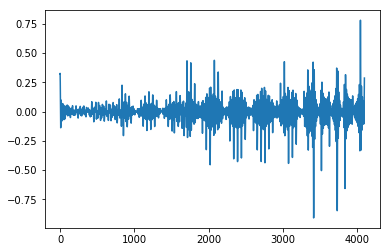

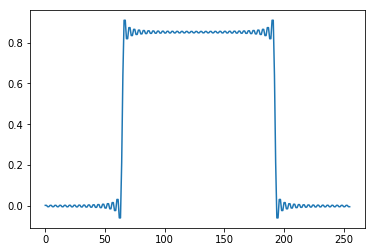

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb  8 23:36:49 2018

@author: Hp
"""

                      ### BIBLIOTHEQUES UTILISES ###

import numpy as np
import matplotlib.pyplot as mpt
import scipy.io.wavfile as wavfile

%matplotlib inline


                                ## EXO 3 ##
## question 1:

## EXEMPLE POUR EXPLIQUER LE RESULTAT DE LA PREMIERE FONCTION :                                
N=4096
n=np.arange(N)
w2=400
y=np.sin(2*np.pi*w2*n/N)
                                
def filtrage(omegac,y,fs):
        ychap=np.fft.fft(y)
        N=ychap.size
        M=int(np.floor(N*omegac/fs))
        mask=np.ones(N) ## REMPLIR Mask DE SIZE N PAR DES 1
        coord=np.arange(M+1,N-M,1)   
        mask[coord]=0
        yfiltchap=mask*ychap
        yfilt=np.fft.ifft(yfiltchap)
        yfilt=yfilt.real
        m=np.max(np.abs(yfilt))
        yfilt=yfilt/(1.1*m)
        return yfilt

l=filtrage(350,y,4096)
mpt.figure(1)
mpt.plot(l)

## QUESTION 2 :

N=256
Y=np.zeros((N))
for n in range(0,256):
    if n>=(N/4)+1 and n<=3*N/4:#
        Y[n]=1
    else:
        Y[n]=0
    
L=filtrage(64,Y,256)
mpt.figure(2)
mpt.plot(L)


# QUESTION 3:
fs=4096

fs, f=wavfile.read('trompEssen.wav')
fs, h=wavfile.read('trompbattEssen.wav')
F=filtrage(4000,f,fs)
H=filtrage(4000,h,fs)

m=np.max(np.abs(F))
F=F/(1.1*m)
wavfile.write('newson3.wav',fs, F)

M=np.max(np.abs(H))
H=H/(1.1*M)
wavfile.write('newson4.wav',fs, H)

## On obitent les memes sons !!!!!                           

## i tried using this function from this site but it may not be what you are looking for? the output file is different from the original, but not sure if it makes any sense lol!

In [42]:
#https://www.garysieling.com/blog/apply-fft-list-wav-files-python
import scipy
import scipy.fftpack

def process(fileWav):
  signal = wavfile.read(fileWav)[1]
 
  t = scipy.linspace(0,120,4000)
 
  FFT = abs(scipy.fft(signal))
  freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
 
  return np.array(freqs)


#ma tentative
fs, f=wavfile.read('/Users/Downloads/trompEssen.wav')
u=process('/Users/Downloads/trompEssen.wav')

wavfile.write('test_.wav',fs, u)

## running your function line by line

In [106]:
omegac=3000
ychap=np.fft.fft(f) #fft of array
#Return discrete Fourier transform of real or complex sequence. The returned complex array contains y(0), y(1),..., y(n-1) where
#y(j) = (x * exp(-2*pi*sqrt(-1)*j*np.arange(n)/n)).sum().
N=ychap.size #95784
M=int(np.floor(N*omegac/fs)) # 6515
mask=np.ones(N) ## REMPLIR Mask DE SIZE N PAR DES 1
coord=np.arange(M+1,N-M,1)   #size = 82753, M= 6515,N=95784
mask[coord]=0  
yfiltchap=mask*ychap 
yfilt=np.fft.ifft(yfiltchap)
yfilt=yfilt.real
m=np.max(np.abs(yfilt))
yfilt=yfilt/(1.1*m)

wavfile.write('test_.wav',fs,yfilt)

In [102]:
bln = ychap == yfiltchap 
indx_F= [i for i, x in enumerate(bln) if not x] #which are False

In [120]:
ychap[indx_F]

array([ -23260.83468753+98337.30216979j,  186299.00132340+81474.85324436j,
        -74374.85917137+45803.21862737j, ...,
        -74374.85917137-45803.21862737j,  186299.00132340-81474.85324436j,
        -23260.83468753-98337.30216979j])

In [125]:
yfiltchap[indx_F] #filtered these original values and now they are 0

array([-0.+0.j,  0.+0.j, -0.+0.j, ...,  0.-0.j,  0.+0.j,  0.-0.j])

## original f values

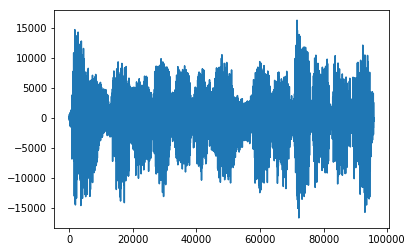

In [109]:
mpt.plot(f)

## after filtering using your function

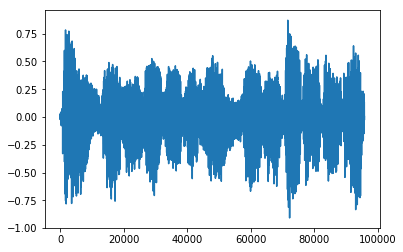

In [110]:
mpt.plot(yfilt)

In [111]:
for g,h in enumerate(yfilt):
    print("original: "+str(f[g])+", fft: "+str(h))

original: 0, fft: 0.00546335086098
original: -7, fft: 0.00571170714376
original: -17, fft: 0.00468799344409
original: -22, fft: 0.00276425111576
original: -12, fft: 0.000396761116973
original: -8, fft: -0.00194456834423
original: -4, fft: -0.00384253814866
original: -5, fft: -0.00498586255536
original: -16, fft: -0.00520281964263
original: -14, fft: -0.00447213913629
original: -27, fft: -0.00291139943329
original: -13, fft: -0.000746427002587
original: -9, fft: 0.00173230831214
original: 21, fft: 0.00421885882728
original: 44, fft: 0.00643883607796
original: 92, fft: 0.00818754922105
original: 131, fft: 0.00935434428048
original: 174, fft: 0.00993071546169
original: 209, fft: 0.010002412643
original: 223, fft: 0.00972817989241
original: 242, fft: 0.00930956982616
original: 226, fft: 0.00895724729198
original: 221, fft: 0.00885923257681
original: 193, fft: 0.00915570429503
original: 188, fft: 0.00992348656693
original: 176, fft: 0.0111714803896
original: 201, fft: 0.0128464020761
origin

original: 389, fft: 0.0141518965025
original: 67, fft: -0.00459126318578
original: -410, fft: -0.0289098136157
original: -1000, fft: -0.0573226809402
original: -1693, fft: -0.0879287675076
original: -2364, fft: -0.118534994747
original: -2915, fft: -0.146809807049
original: -3349, fft: -0.170447644378
original: -3606, fft: -0.187329879111
original: -3692, fft: -0.195669409914
original: -3607, fft: -0.194129034675
original: -3290, fft: -0.181907264168
original: -2799, fft: -0.158788751907
original: -2192, fft: -0.125159474594
original: -1486, fft: -0.0819888733994
original: -612, fft: -0.0307822787995
original: 382, fft: 0.0264927497075
original: 1455, fft: 0.0875026914629
original: 2612, fft: 0.149663652906
original: 3834, fft: 0.210272819276
original: 4975, fft: 0.266651522597
original: 6032, fft: 0.316294221134
original: 6924, fft: 0.357015756302
original: 7480, fft: 0.387087265457
original: 7668, fft: 0.405349636079
original: 7752, fft: 0.411292964975
original: 7738, fft: 0.40509160

original: 2235, fft: 0.124420906913
original: 1635, fft: 0.0925081028664
original: 969, fft: 0.0562971500661
original: 289, fft: 0.0185570541302
original: -346, fft: -0.0179504173296
original: -936, fft: -0.0507371294617
original: -1426, fft: -0.0778218317457
original: -1778, fft: -0.0979033574052
original: -1962, fft: -0.110454032979
original: -2049, fft: -0.115723447603
original: -2062, fft: -0.11465404968
original: -1990, fft: -0.108721260827
original: -1871, fft: -0.0997203694793
original: -1753, fft: -0.0895290347449
original: -1624, fft: -0.0798768435082
original: -1479, fft: -0.0721516223456
original: -1405, fft: -0.067266336616
original: -1377, fft: -0.0656012427537
original: -1380, fft: -0.0670248191636
original: -1363, fft: -0.0709855131487
original: -1386, fft: -0.076656198394
original: -1443, fft: -0.0831059443668
original: -1520, fft: -0.0894703429294
original: -1606, fft: -0.0950927183649
original: -1705, fft: -0.0996138939066
original: -1830, fft: -0.102996976909
origina

original: -4862, fft: -0.246411532222
original: -4489, fft: -0.226471446129
original: -4078, fft: -0.209278419255
original: -3727, fft: -0.193800831533
original: -3372, fft: -0.178904808758
original: -2983, fft: -0.16355952513
original: -2603, fft: -0.147002032709
original: -2250, fft: -0.128845168409
original: -1878, fft: -0.109121389321
original: -1519, fft: -0.0882645774425
original: -1176, fft: -0.0670396669518
original: -864, fft: -0.0464354444232
original: -579, fft: -0.0275385599
original: -332, fft: -0.01140664281
original: -157, fft: 0.0010441518502
original: -48, fft: 0.00912610898756
original: 59, fft: 0.0124354441971
original: 103, fft: 0.0108753108682
original: 36, fft: 0.00464944376298
original: -76, fft: -0.00576765849201
original: -214, fft: -0.0196768621159
original: -505, fft: -0.0362098578209
original: -836, fft: -0.0543881940093
original: -1184, fft: -0.0731818922261
original: -1582, fft: -0.0915654253264
original: -2007, fft: -0.108570165296
original: -2372, fft: -

original: 1518, fft: 0.0779486059302
original: 1052, fft: 0.0506593914201
original: 543, fft: 0.0221891537671
original: -9, fft: -0.00554866671017
original: -493, fft: -0.0306823523253
original: -937, fft: -0.0515488267297
original: -1278, fft: -0.0668337574908
original: -1498, fft: -0.0756701857378
original: -1548, fft: -0.0776870151852
original: -1455, fft: -0.0730055071508
original: -1248, fft: -0.0621885430661
original: -932, fft: -0.0461528892917
original: -513, fft: -0.0260583139642
original: -51, fft: -0.00318877186626
original: 428, fft: 0.0211600279466
original: 915, fft: 0.0457751903911
original: 1375, fft: 0.0695960068054
original: 1792, fft: 0.0917554863943
original: 2147, fft: 0.111595819481
original: 2457, fft: 0.128663000043
original: 2715, fft: 0.142687852514
original: 2889, fft: 0.153561103246
original: 3012, fft: 0.161309028964
original: 3104, fft: 0.166073986056
original: 3143, fft: 0.168101338917
original: 3111, fft: 0.167731593009
original: 3056, fft: 0.16539447501

original: -594, fft: -0.0331084305199
original: -549, fft: -0.0365971881321
original: -574, fft: -0.0415632494309
original: -672, fft: -0.047510757795
original: -844, fft: -0.0539001921171
original: -1052, fft: -0.0602379619394
original: -1277, fft: -0.066151594392
original: -1482, fft: -0.0714387828141
original: -1635, fft: -0.0760832375121
original: -1724, fft: -0.0802359990254
original: -1761, fft: -0.0841666921727
original: -1747, fft: -0.0881941576033
original: -1735, fft: -0.0926091907854
original: -1723, fft: -0.0976032240874
original: -1782, fft: -0.103215551354
original: -1877, fft: -0.109308352213
original: -2023, fft: -0.115573909559
original: -2209, fft: -0.121572860903
original: -2399, fft: -0.126797022582
original: -2559, fft: -0.130746164873
original: -2646, fft: -0.133005786479
original: -2667, fft: -0.133312815756
original: -2612, fft: -0.13159825581
original: -2488, fft: -0.127999721044
original: -2326, fft: -0.122841905343
original: -2154, fft: -0.116588406814
origin

original: -1743, fft: -0.0926615839949
original: -1705, fft: -0.0894950519751
original: -1651, fft: -0.0859547548994
original: -1589, fft: -0.08200707114
original: -1518, fft: -0.0776707379949
original: -1437, fft: -0.0730132897604
original: -1333, fft: -0.0681375687667
original: -1217, fft: -0.0631596007071
original: -1082, fft: -0.0581806310363
original: -969, fft: -0.0532573510321
original: -838, fft: -0.0483750796645
original: -731, fft: -0.0434287478471
original: -637, fft: -0.038215881031
original: -558, fft: -0.0324444280996
original: -467, fft: -0.0257563828475
original: -376, fft: -0.0177659276542
original: -231, fft: -0.00810859993829
original: -51, fft: 0.0035039354166
original: 201, fft: 0.0172302329365
original: 530, fft: 0.0330537328341
original: 916, fft: 0.0507524724911
original: 1345, fft: 0.0698891605409
original: 1786, fft: 0.089824736233
original: 2208, fft: 0.109755818855
original: 2584, fft: 0.128773554367
original: 2885, fft: 0.145938665525
original: 3089, fft: 0

original: -1545, fft: -0.0884913526892
original: -1683, fft: -0.0950761939427
original: -1808, fft: -0.100067791099
original: -1922, fft: -0.103320152704
original: -2006, fft: -0.104897394662
original: -2059, fft: -0.10505689274
original: -2070, fft: -0.104206509223
original: -2047, fft: -0.102842024277
original: -2000, fft: -0.101473793765
original: -1944, fft: -0.100553158711
original: -1890, fft: -0.100409008526
original: -1860, fft: -0.101203177304
original: -1870, fft: -0.102910319341
original: -1914, fft: -0.1053240697
original: -1980, fft: -0.10808728149
original: -2050, fft: -0.110740599304
original: -2119, fft: -0.112781145696
original: -2170, fft: -0.11372204808
original: -2177, fft: -0.113144051878
original: -2132, fft: -0.11073241673
original: -2045, fft: -0.106295295966
original: -1893, fft: -0.0997632979269
original: -1708, fft: -0.0911732854273
original: -1502, fft: -0.0806420850312
original: -1271, fft: -0.0683371901153
original: -1025, fft: -0.054451512828
original: -7

original: -2562, fft: -0.136983559423
original: -2786, fft: -0.152225989824
original: -2933, fft: -0.16315164074
original: -3029, fft: -0.169959358579
original: -3094, fft: -0.1729460857
original: -3141, fft: -0.172488253016
original: -3140, fft: -0.169019036856
original: -3120, fft: -0.16300371369
original: -3060, fft: -0.154916250045
original: -2935, fft: -0.145220556336
original: -2741, fft: -0.13435935506
original: -2496, fft: -0.12275237212
original: -2188, fft: -0.110803734102
original: -1858, fft: -0.0989163705714
original: -1547, fft: -0.0875092954818
original: -1264, fft: -0.0770323040105
original: -1070, fft: -0.067972225023
original: -946, fft: -0.060845619102
original: -932, fft: -0.0561747089655
original: -1001, fft: -0.0544461543326
original: -1122, fft: -0.056055620815
original: -1297, fft: -0.0612443897993
original: -1535, fft: -0.0700369145377
original: -1748, fft: -0.082189705052
original: -1981, fft: -0.0971618366926
original: -2219, fft: -0.114115575862
original: -2

original: 1838, fft: 0.0980809433678
original: 2131, fft: 0.117055488966
original: 2441, fft: 0.13476365477
original: 2741, fft: 0.150591666309
original: 3010, fft: 0.164087363801
original: 3240, fft: 0.174989665004
original: 3430, fft: 0.183234273031
original: 3580, fft: 0.188935055708
original: 3689, fft: 0.192343989789
original: 3737, fft: 0.193795749539
original: 3735, fft: 0.193645416633
original: 3684, fft: 0.192208982895
original: 3620, fft: 0.189716062813
original: 3515, fft: 0.186282500012
original: 3423, fft: 0.181907546517
original: 3291, fft: 0.176496435176
original: 3167, fft: 0.169905030556
original: 3010, fft: 0.161999479679
original: 2859, fft: 0.152721008455
original: 2664, fft: 0.142144707732
original: 2448, fft: 0.130521592956
original: 2221, fft: 0.118295402403
original: 2007, fft: 0.10608923937
original: 1798, fft: 0.0946617365174
original: 1626, fft: 0.084837229599
original: 1495, fft: 0.0774187147432
original: 1411, fft: 0.073095428894
original: 1386, fft: 0.0723

original: 5075, fft: 0.267647359973
original: 4845, fft: 0.256504287545
original: 4604, fft: 0.244269183507
original: 4363, fft: 0.231895429317
original: 4151, fft: 0.220336248109
original: 3968, fft: 0.210470404142
original: 3845, fft: 0.203016157333
original: 3770, fft: 0.198441430402
original: 3743, fft: 0.196881369346
original: 3755, fft: 0.198076145757
original: 3822, fft: 0.201341437326
original: 3881, fft: 0.205581354555
original: 3923, fft: 0.209348881125
original: 3929, fft: 0.210952767246
original: 3884, fft: 0.208603158046
original: 3749, fft: 0.20058210177
original: 3492, fft: 0.185420491773
original: 3083, fft: 0.162060779113
original: 2496, fft: 0.129985430308
original: 1723, fft: 0.0892946391252
original: 814, fft: 0.0407228131574
original: -242, fft: -0.0144089791894
original: -1385, fft: -0.074299204043
original: -2589, fft: -0.13681775925
original: -3792, fft: -0.199684888074
original: -4954, fft: -0.260655340469
original: -6038, fft: -0.317686045257
original: -7009, 

original: 3172, fft: 0.161383082378
original: 3275, fft: 0.163071492108
original: 3332, fft: 0.163621710947
original: 3288, fft: 0.161449396485
original: 3101, fft: 0.154975214471
original: 2769, fft: 0.142789172768
original: 2288, fft: 0.123804188986
original: 1654, fft: 0.0973818179431
original: 932, fft: 0.0634162355982
original: 137, fft: 0.0223674119516
original: -720, fft: -0.0247597266961
original: -1587, fft: -0.0764872054111
original: -2484, fft: -0.130978405304
original: -3388, fft: -0.186181962373
original: -4281, fft: -0.239989445399
original: -5176, fft: -0.290390374544
original: -6042, fft: -0.335609406772
original: -6855, fft: -0.374213503053
original: -7571, fft: -0.405181127485
original: -8152, fft: -0.427930393643
original: -8560, fft: -0.442307905832
original: -8753, fft: -0.448544228418
original: -8743, fft: -0.447184971657
original: -8527, fft: -0.439008114283
original: -8149, fft: -0.424938316117
original: -7641, fft: -0.405967744689
original: -7080, fft: -0.38309

original: 267, fft: 0.00715806524804
original: 414, fft: 0.0192765830172
original: 635, fft: 0.0354029691826
original: 935, fft: 0.0554130228403
original: 1327, fft: 0.0788120008637
original: 1809, fft: 0.104747412899
original: 2362, fft: 0.132062284599
original: 2944, fft: 0.159384743566
original: 3493, fft: 0.185245574118
original: 3979, fft: 0.208212076483
original: 4384, fft: 0.22702452276
original: 4668, fft: 0.24072094768
original: 4805, fft: 0.248737000531
original: 4813, fft: 0.250969999891
original: 4720, fft: 0.247799907446
original: 4546, fft: 0.240064285099
original: 4274, fft: 0.228988959698
original: 4008, fft: 0.216080606964
original: 3748, fft: 0.202991321001
original: 3535, fft: 0.191368070866
original: 3371, fft: 0.182701482537
original: 3330, fft: 0.178188478718
original: 3375, fft: 0.178621961458
original: 3494, fft: 0.184318077004
original: 3723, fft: 0.195087929019
original: 4034, fft: 0.210256274122
original: 4384, fft: 0.228725173702
original: 4754, fft: 0.24907

original: -1880, fft: -0.096722766364
original: -1727, fft: -0.0925605840953
original: -1618, fft: -0.0892715212616
original: -1545, fft: -0.0866620003352
original: -1515, fft: -0.084583339287
original: -1477, fft: -0.0829202706431
original: -1469, fft: -0.0815760347873
original: -1470, fft: -0.0804586335339
original: -1488, fft: -0.0794719334389
original: -1520, fft: -0.0785137363305
original: -1547, fft: -0.0774810363947
original: -1542, fft: -0.0762808540359
original: -1502, fft: -0.0748436425933
original: -1447, fft: -0.0731355738876
original: -1371, fft: -0.0711661467512
original: -1287, fft: -0.0689884885326
original: -1204, fft: -0.0666912385479
original: -1157, fft: -0.0643827055423
original: -1103, fft: -0.0621697149326
original: -1061, fft: -0.0601348575188
original: -1035, fft: -0.0583164521203
original: -1021, fft: -0.0566953044583
original: -1027, fft: -0.0551913051894
original: -1055, fft: -0.0536712369641
original: -1078, fft: -0.0519671515643
original: -1056, fft: -0.04

original: 4672, fft: 0.246796019162
original: 3791, fft: 0.203963857885
original: 2871, fft: 0.158257263877
original: 1983, fft: 0.111231257514
original: 1126, fft: 0.0643823598269
original: 260, fft: 0.0190600674626
original: -484, fft: -0.0235966017858
original: -1145, fft: -0.0626953087032
original: -1749, fft: -0.0976006403318
original: -2276, fft: -0.127922498738
original: -2738, fft: -0.153488524187
original: -3182, fft: -0.174307145468
original: -3552, fft: -0.190527519154
original: -3852, fft: -0.202401478258
original: -4071, fft: -0.21025097586
original: -4189, fft: -0.214442730927
original: -4202, fft: -0.215370181754
original: -4147, fft: -0.213441665615
original: -4017, fft: -0.20907309579
original: -3810, fft: -0.202683300854
original: -3585, fft: -0.194690519971
original: -3379, fft: -0.185509131746
original: -3175, fft: -0.175546323966
original: -2980, fft: -0.165198896793
original: -2842, fft: -0.154850601175
original: -2733, fft: -0.144870300515
original: -2614, fft: -

original: 1293, fft: 0.0673388571029
original: 1486, fft: 0.0773352903192
original: 1629, fft: 0.084789166715
original: 1717, fft: 0.0895440171659
original: 1724, fft: 0.091606070416
original: 1720, fft: 0.0911499151313
original: 1660, fft: 0.0885119872201
original: 1577, fft: 0.0841704497865
original: 1473, fft: 0.0787114779793
original: 1376, fft: 0.0727837042439
original: 1267, fft: 0.0670443641505
original: 1178, fft: 0.0621022164073
original: 1102, fft: 0.0584633128957
original: 1057, fft: 0.0564859471264
original: 1030, fft: 0.0563504963484
original: 1055, fft: 0.0580484058395
original: 1135, fft: 0.0613923901766
original: 1254, fft: 0.0660473109695
original: 1384, fft: 0.071578483042
original: 1525, fft: 0.0775117451361
original: 1622, fft: 0.0833978682485
original: 1724, fft: 0.0888730483026
original: 1791, fft: 0.093707500506
original: 1842, fft: 0.0978355495578
original: 1881, fft: 0.101362943989
original: 1919, fft: 0.104550123892
original: 1969, fft: 0.107773444436
original

original: -2135, fft: -0.113211062093
original: -2402, fft: -0.128872938424
original: -2635, fft: -0.141838070321
original: -2788, fft: -0.15116998374
original: -2899, fft: -0.156214433825
original: -2923, fft: -0.156634635575
original: -2881, fft: -0.152414239762
original: -2757, fft: -0.143831942794
original: -2554, fft: -0.131414664787
original: -2267, fft: -0.115877905058
original: -1917, fft: -0.0980620434413
original: -1503, fft: -0.0788721115998
original: -1095, fft: -0.0592262527098
original: -687, fft: -0.0400152265009
original: -342, fft: -0.022072477583
original: -50, fft: -0.00615201554044
original: 170, fft: 0.00708992449055
original: 316, fft: 0.0171135424568
original: 411, fft: 0.0235174367197
original: 435, fft: 0.0260647938871
original: 427, fft: 0.0247121758506
original: 326, fft: 0.0196367778598
original: 187, fft: 0.0112561520964
original: -2, fft: 0.000233596908707
original: -215, fft: -0.0125370127388
original: -440, fft: -0.0259711904342
original: -673, fft: -0.0

original: -3058, fft: -0.165536376134
original: -3124, fft: -0.167941496544
original: -3187, fft: -0.168940814247
original: -3206, fft: -0.168231795827
original: -3197, fft: -0.165724113052
original: -3118, fft: -0.161517295267
original: -3013, fft: -0.155852063008
original: -2846, fft: -0.149044518401
original: -2658, fft: -0.141414510582
original: -2450, fft: -0.133219916958
original: -2272, fft: -0.124607263298
original: -2083, fft: -0.115586281214
original: -1942, fft: -0.106032119196
original: -1787, fft: -0.0957145767278
original: -1628, fft: -0.0843495682105
original: -1426, fft: -0.0716646504387
original: -1186, fft: -0.057468339795
original: -886, fft: -0.0417123818859
original: -526, fft: -0.024537163103
original: -128, fft: -0.0062928841539
original: 275, fft: 0.0124674345124
original: 675, fft: 0.0310230959626
original: 1020, fft: 0.0485451244592
original: 1310, fft: 0.0641727662524
original: 1517, fft: 0.0770977371818
original: 1649, fft: 0.0866459749836
original: 1700, ff

original: -8080, fft: -0.420799036191
original: -7583, fft: -0.393738903926
original: -7008, fft: -0.363802116267
original: -6338, fft: -0.331657937274
original: -5640, fft: -0.297899941805
original: -4922, fft: -0.263069300548
original: -4192, fft: -0.227690158589
original: -3497, fft: -0.192308686262
original: -2839, fft: -0.157526695302
original: -2240, fft: -0.124021487253
original: -1694, fft: -0.0925457429847
original: -1201, fft: -0.063904467661
original: -785, fft: -0.0389097998352
original: -438, fft: -0.0183183015977
original: -160, fft: -0.00275858017864
original: 31, fft: 0.00734076254336
original: 134, fft: 0.0118121544683
original: 142, fft: 0.010789240903
original: 92, fft: 0.00471880904909
original: -65, fft: -0.00565941352512
original: -273, fft: -0.019364704824
original: -560, fft: -0.0352543367397
original: -875, fft: -0.0521211298195
original: -1215, fft: -0.0687984187791
original: -1552, fft: -0.0842600789452
original: -1848, fft: -0.0977037334494
original: -2099, 

original: -3556, fft: -0.188432314121
original: -3966, fft: -0.210570961517
original: -4331, fft: -0.229723073423
original: -4617, fft: -0.245137306613
original: -4831, fft: -0.256253093555
original: -4954, fft: -0.262740176843
original: -4997, fft: -0.264518875641
original: -4960, fft: -0.261759076015
original: -4831, fft: -0.254858226771
original: -4627, fft: -0.244400881303
original: -4364, fft: -0.231104277428
original: -4071, fft: -0.215755856132
original: -3760, fft: -0.199149322788
original: -3438, fft: -0.182025777687
original: -3105, fft: -0.165025612386
original: -2783, fft: -0.148655402384
original: -2498, fft: -0.133272118748
original: -2239, fft: -0.119084873828
original: -1991, fft: -0.106172368925
original: -1781, fft: -0.0945124688853
original: -1595, fft: -0.0840190894758
original: -1420, fft: -0.0745809798215
original: -1269, fft: -0.0660970648136
original: -1127, fft: -0.0585037477606
original: -999, fft: -0.0517908510262
original: -881, fft: -0.0460045202958
origina

original: 1414, fft: 0.0714801176057
original: 1466, fft: 0.0726063061698
original: 1493, fft: 0.0741959881278
original: 1510, fft: 0.076256385438
original: 1515, fft: 0.0787061392056
original: 1511, fft: 0.0813747667149
original: 1519, fft: 0.0840101875027
original: 1539, fft: 0.0862944848674
original: 1562, fft: 0.087867548421
original: 1589, fft: 0.0883576149594
original: 1596, fft: 0.0874170035617
original: 1597, fft: 0.0847605774459
original: 1556, fft: 0.0802037485265
original: 1473, fft: 0.0736962897377
original: 1347, fft: 0.0653479673653
original: 1172, fft: 0.0554421731151
original: 920, fft: 0.044434408843
original: 642, fft: 0.0329336791952
original: 368, fft: 0.0216665220009
original: 118, fft: 0.0114254090229
original: -81, fft: 0.00300535685535
original: -194, fft: -0.00286548134758
original: -189, fft: -0.00559401948477
original: -100, fft: -0.004781315392
original: 54, fft: -0.000264860978494
original: 241, fft: 0.00786226061024
original: 461, fft: 0.0192593831673
orig

original: 2106, fft: 0.112576746231
original: 2345, fft: 0.124975851492
original: 2580, fft: 0.137672318047
original: 2820, fft: 0.150356371466
original: 3068, fft: 0.162620197154
original: 3278, fft: 0.173981936661
original: 3473, fft: 0.183919682804
original: 3620, fft: 0.191912146479
original: 3727, fft: 0.197481831027
original: 3774, fft: 0.200236162815
original: 3770, fft: 0.199902140702
original: 3704, fft: 0.196350680284
original: 3585, fft: 0.189607884741
original: 3403, fft: 0.179851865788
original: 3170, fft: 0.167395318209
original: 2897, fft: 0.152655645993
original: 2586, fft: 0.136115865474
original: 2264, fft: 0.118280601703
original: 1893, fft: 0.099632111154
original: 1527, fft: 0.0805913196756
original: 1133, fft: 0.0614883347117
original: 753, fft: 0.0425458198798
original: 390, fft: 0.0238771194411
original: 58, fft: 0.00549925824828
original: -255, fft: -0.0126408740444
original: -567, fft: -0.0306304965265
original: -885, fft: -0.0485496873501
original: -1212, fft

original: -545, fft: -0.0147203510659
original: -635, fft: -0.017547891458
original: -644, fft: -0.0203861975351
original: -610, fft: -0.0232960114415
original: -555, fft: -0.026420975537
original: -496, fft: -0.029934206923
original: -468, fft: -0.0339815102771
original: -506, fft: -0.0386289736091
original: -600, fft: -0.0438216724302
original: -737, fft: -0.0493585476225
original: -922, fft: -0.0548864913028
original: -1107, fft: -0.0599145390672
original: -1260, fft: -0.0638470501794
original: -1361, fft: -0.0660330187711
original: -1402, fft: -0.0658272872525
original: -1355, fft: -0.0626584546927
original: -1209, fft: -0.0560976738779
original: -978, fft: -0.0459222816972
original: -662, fft: -0.0321682870184
original: -276, fft: -0.015166149719
original: 172, fft: 0.0044449492726
original: 614, fft: 0.0257279832267
original: 1059, fft: 0.047486141902
original: 1442, fft: 0.0683281003585
original: 1759, fft: 0.0867581299025
original: 1967, fft: 0.101286088991
original: 2079, fft:

original: -4781, fft: -0.24814459449
original: -4420, fft: -0.231709934046
original: -4018, fft: -0.214136850511
original: -3609, fft: -0.195758399529
original: -3206, fft: -0.176595963698
original: -2808, fft: -0.156472497151
original: -2410, fft: -0.135152514892
original: -2048, fft: -0.112486325978
original: -1646, fft: -0.0885359805984
original: -1245, fft: -0.0636634895411
original: -829, fft: -0.0385675975208
original: -417, fft: -0.0142629116058
original: 1, fft: 0.00799656662791
original: 384, fft: 0.0268396281583
original: 701, fft: 0.0409295387916
original: 932, fft: 0.0491249596032
original: 1022, fft: 0.0506286220336
original: 986, fft: 0.0451039484758
original: 761, fft: 0.0327440795378
original: 404, fft: 0.0142839873912
original: -73, fft: -0.00904636846576
original: -633, fft: -0.0356225490457
original: -1231, fft: -0.0635680793003
original: -1804, fft: -0.0909223682729
original: -2319, fft: -0.115815152193
original: -2703, fft: -0.136628454627
original: -2986, fft: -0.

original: -3220, fft: -0.165474547982
original: -3324, fft: -0.171272389174
original: -3433, fft: -0.177806819769
original: -3517, fft: -0.184724587056
original: -3606, fft: -0.191498382469
original: -3670, fft: -0.197494460625
original: -3718, fft: -0.202056012297
original: -3744, fft: -0.20459120145
original: -3752, fft: -0.20465402237
original: -3732, fft: -0.202007024933
original: -3682, fft: -0.196657376523
original: -3591, fft: -0.188861337622
original: -3463, fft: -0.179096512495
original: -3283, fft: -0.168005590633
original: -3078, fft: -0.156319108197
original: -2837, fft: -0.144767506932
original: -2601, fft: -0.133994085887
original: -2362, fft: -0.124480173646
original: -2151, fft: -0.116492066773
original: -1990, fft: -0.110056264578
original: -1866, fft: -0.10496572449
original: -1786, fft: -0.100815802743
original: -1734, fft: -0.0970647818212
original: -1695, fft: -0.0931109044289
original: -1662, fft: -0.088375989431
original: -1602, fft: -0.0823851821638
original: -1

original: -88, fft: -0.0111163838686
original: -17, fft: -0.00659427676893
original: 118, fft: 0.00229435754863
original: 302, fft: 0.0146467797279
original: 538, fft: 0.0292879267428
original: 789, fft: 0.0449123176545
original: 1058, fft: 0.0602334853931
original: 1304, fft: 0.0741213904023
original: 1529, fft: 0.0857108586166
original: 1711, fft: 0.0944689653438
original: 1842, fft: 0.100215643205
original: 1934, fft: 0.10309861903
original: 1986, fft: 0.103530044741
original: 2001, fft: 0.102096976738
original: 1986, fft: 0.0994605419781
original: 1928, fft: 0.0962589285197
original: 1863, fft: 0.0930273611404
original: 1764, fft: 0.0901444260998
original: 1676, fft: 0.087809211403
original: 1578, fft: 0.0860485797494
original: 1496, fft: 0.0847493277502
original: 1436, fft: 0.0837066947387
original: 1422, fft: 0.0826791006716
original: 1426, fft: 0.0814392354176
original: 1460, fft: 0.0798134955828
original: 1492, fft: 0.0777048095954
original: 1492, fft: 0.0750974760344
original:

original: -606, fft: -0.0316493027867
original: -1303, fft: -0.068907862158
original: -1951, fft: -0.104120614478
original: -2551, fft: -0.136070245862
original: -3069, fft: -0.163884111579
original: -3503, fft: -0.18706661694
original: -3853, fft: -0.205484629508
original: -4126, fft: -0.21931062522
original: -4318, fft: -0.228934015428
original: -4447, fft: -0.234855311542
original: -4512, fft: -0.237579841228
original: -4517, fft: -0.237527327793
original: -4470, fft: -0.234970836001
original: -4371, fft: -0.230013783313
original: -4221, fft: -0.222607624471
original: -4009, fft: -0.212606344303
original: -3742, fft: -0.199848005372
original: -3437, fft: -0.18424917833
original: -3081, fft: -0.165895803654
original: -2686, fft: -0.145114248311
original: -2285, fft: -0.122509014541
original: -1866, fft: -0.0989583468111
original: -1463, fft: -0.0755651714143
original: -1067, fft: -0.0535674864706
original: -711, fft: -0.0342185185477
original: -406, fft: -0.0186517657533
original: -1

original: -729, fft: -0.0398576617946
original: -853, fft: -0.0465038563112
original: -971, fft: -0.0522700908892
original: -1053, fft: -0.0566410966692
original: -1104, fft: -0.0591557924091
original: -1121, fft: -0.0594622982427
original: -1101, fft: -0.0573640200151
original: -1012, fft: -0.0528503936625
original: -895, fft: -0.046107831276
original: -728, fft: -0.0375089811515
original: -545, fft: -0.0275812257864
original: -323, fft: -0.016957990359
original: -117, fft: -0.00631855122224
original: 78, fft: 0.00367665884751
original: 246, fft: 0.0124479035966
original: 406, fft: 0.0195484228808
original: 499, fft: 0.0247018459252
original: 543, fft: 0.0278214609039
original: 549, fft: 0.0290103412427
original: 536, fft: 0.0285435400466
original: 487, fft: 0.0268354172223
original: 431, fft: 0.0243964485149
original: 374, fft: 0.0217844777464
original: 339, fft: 0.0195553223172
original: 329, fft: 0.0182170369282
original: 347, fft: 0.0181911616684
original: 404, fft: 0.019783139408

original: 116, fft: 0.000708379671572
original: 191, fft: 0.00734833160773
original: 274, fft: 0.0152976026424
original: 335, fft: 0.0240778834906
original: 436, fft: 0.0331118676619
original: 603, fft: 0.0417859160101
original: 823, fft: 0.0495155887418
original: 1041, fft: 0.0558053861957
original: 1209, fft: 0.0602951314864
original: 1305, fft: 0.0627876271106
original: 1328, fft: 0.0632551575628
original: 1291, fft: 0.0618256109544
original: 1211, fft: 0.0587519409279
original: 1068, fft: 0.0543709234379
original: 900, fft: 0.0490583458105
original: 737, fft: 0.043187742922
original: 609, fft: 0.0370986154814
original: 494, fft: 0.0310779676471
original: 394, fft: 0.0253563721277
original: 317, fft: 0.0201170760483
original: 259, fft: 0.0155143639775
original: 241, fft: 0.0116958785796
original: 208, fft: 0.00882310261653
original: 187, fft: 0.00708478405384
original: 211, fft: 0.00669960594594
original: 265, fft: 0.00790657025949
original: 298, fft: 0.0109439786648
original: 333, 

original: 1215, fft: 0.0571174060844
original: 1160, fft: 0.0564011081451
original: 1098, fft: 0.0569668465037
original: 1062, fft: 0.0585739886673
original: 1056, fft: 0.0611966583585
original: 1113, fft: 0.0650491659196
original: 1194, fft: 0.0705619728603
original: 1363, fft: 0.0783126858249
original: 1600, fft: 0.0889239093159
original: 1931, fft: 0.102945135539
original: 2316, fft: 0.120738360855
original: 2775, fft: 0.14238639848
original: 3289, fft: 0.167639038074
original: 3818, fft: 0.195905921002
original: 4334, fft: 0.226297293788
original: 4883, fft: 0.257705943176
original: 5454, fft: 0.288916901666
original: 6010, fft: 0.318727052775
original: 6496, fft: 0.346055301211
original: 6935, fft: 0.370025752587
original: 7292, fft: 0.39001108306
original: 7577, fft: 0.40563019408
original: 7790, fft: 0.41670219988
original: 7940, fft: 0.423166465574
original: 7992, fft: 0.424984519837
original: 7979, fft: 0.422043173874
original: 7880, fft: 0.41407847262
original: 7676, fft: 0.4

original: -6931, fft: -0.360550139163
original: -6213, fft: -0.324265993813
original: -5461, fft: -0.287041828964
original: -4699, fft: -0.2500330142
original: -3939, fft: -0.213954185662
original: -3242, fft: -0.179127128067
original: -2573, fft: -0.145572170676
original: -1985, fft: -0.113125876119
original: -1439, fft: -0.0815663991722
original: -929, fft: -0.0507290175656
original: -442, fft: -0.0205975674847
original: 47, fft: 0.00863781118392
original: 524, fft: 0.036560886564
original: 1015, fft: 0.0625465678791
original: 1466, fft: 0.0858098128073
original: 1883, fft: 0.105477706553
original: 2247, fft: 0.120674534134
original: 2516, fft: 0.130609452588
original: 2654, fft: 0.134657394597
original: 2665, fft: 0.132425740308
original: 2527, fft: 0.123801662824
original: 2229, fft: 0.10897748693
original: 1790, fft: 0.0884535841857
original: 1244, fft: 0.0630200638483
original: 618, fft: 0.0337197413064
original: -79, fft: 0.00179561870134
original: -784, fft: -0.0313734837332
or

original: -3482, fft: -0.180068561041
original: -3169, fft: -0.162564794058
original: -2784, fft: -0.142225220226
original: -2343, fft: -0.120110559728
original: -1865, fft: -0.0972666117334
original: -1390, fft: -0.074646407559
original: -950, fft: -0.053048708435
original: -545, fft: -0.0330780891508
original: -181, fft: -0.0151289967481
original: 124, fft: 0.000606816685457
original: 349, fft: 0.0141128251144
original: 511, fft: 0.0255057078788
original: 638, fft: 0.0349855765716
original: 731, fft: 0.0427856160375
original: 835, fft: 0.0491277413435
original: 918, fft: 0.0541895125968
original: 998, fft: 0.0580856244918
original: 1080, fft: 0.0608650829732
original: 1152, fft: 0.0625229957206
original: 1216, fft: 0.0630240071446
original: 1242, fft: 0.0623330134127
original: 1236, fft: 0.0604480295229
original: 1182, fft: 0.0574299918244
original: 1109, fft: 0.0534248263001
original: 986, fft: 0.0486741884917
original: 842, fft: 0.0435127318267
original: 697, fft: 0.0383514104792
o

original: -1627, fft: -0.0815190998537
original: -1437, fft: -0.0767229811038
original: -1243, fft: -0.0722307989829
original: -1106, fft: -0.0686533147616
original: -1039, fft: -0.0665009870774
original: -1063, fft: -0.0661005165173
original: -1161, fft: -0.0675284487486
original: -1320, fft: -0.0705725545339
original: -1509, fft: -0.0747284526291
original: -1666, fft: -0.0792344291313
original: -1771, fft: -0.0831422566225
original: -1792, fft: -0.0854167674358
original: -1725, fft: -0.0850527312861
original: -1558, fft: -0.0811948621571
original: -1322, fft: -0.0732459574494
original: -1015, fft: -0.0609494020431
original: -659, fft: -0.0444353974204
original: -269, fft: -0.0242248674447
original: 114, fft: -0.00119039875777
original: 481, fft: 0.023520970991
original: 866, fft: 0.0485935668439
original: 1242, fft: 0.0726645760938
original: 1625, fft: 0.0944467652181
original: 1980, fft: 0.112838375291
original: 2287, fft: 0.127008443682
original: 2532, fft: 0.136449551052
original:

original: -2151, fft: -0.111400921843
original: -2635, fft: -0.135095723628
original: -3108, fft: -0.16007543237
original: -3557, fft: -0.184831261049
original: -3965, fft: -0.207915595356
original: -4296, fft: -0.228022362063
original: -4557, fft: -0.244052640451
original: -4744, fft: -0.255162854461
original: -4855, fft: -0.260794141
original: -4870, fft: -0.260682663661
original: -4800, fft: -0.254851718834
original: -4610, fft: -0.24358746186
original: -4343, fft: -0.227400957992
original: -3967, fft: -0.206980011938
original: -3507, fft: -0.18313480227
original: -2985, fft: -0.156741676273
original: -2420, fft: -0.12868947429
original: -1850, fft: -0.0998323918541
original: -1279, fft: -0.0709526293525
original: -771, fft: -0.0427349517917
original: -272, fft: -0.0157538765649
original: 178, fft: 0.00952732408581
original: 595, fft: 0.0327480814919
original: 983, fft: 0.0536359052916
original: 1322, fft: 0.0719898303412
original: 1624, fft: 0.0876661684035
original: 1879, fft: 0.1

original: 3313, fft: 0.172738672173
original: 3064, fft: 0.159878158839
original: 2781, fft: 0.145344467143
original: 2462, fft: 0.129891983399
original: 2145, fft: 0.114278160775
original: 1840, fft: 0.0992115294945
original: 1563, fft: 0.0853070657666
original: 1329, fft: 0.0730528152398
original: 1146, fft: 0.0627902917931
original: 1014, fft: 0.0547095422528
original: 926, fft: 0.0488580881903
original: 879, fft: 0.0451614360141
original: 859, fft: 0.0434516701661
original: 866, fft: 0.0434999475817
original: 886, fft: 0.0450485665022
original: 924, fft: 0.0478386889523
original: 973, fft: 0.0516306830358
original: 1049, fft: 0.0562152883326
original: 1132, fft: 0.061415223319
original: 1236, fft: 0.0670782575606
original: 1351, fft: 0.0730639794523
original: 1471, fft: 0.0792273481882
original: 1604, fft: 0.0854025209172
original: 1726, fft: 0.0913903484106
original: 1844, fft: 0.0969523565076
original: 1945, fft: 0.101813059365
original: 2014, fft: 0.105671217513
original: 2069, 

original: -3304, fft: -0.165121075196
original: -3203, fft: -0.156036112292
original: -3063, fft: -0.148261471979
original: -2915, fft: -0.142962569358
original: -2780, fft: -0.140818798711
original: -2675, fft: -0.141948017422
original: -2670, fft: -0.145910762217
original: -2681, fft: -0.151790884769
original: -2760, fft: -0.158338553786
original: -2862, fft: -0.164153267884
original: -2976, fft: -0.167879827057
original: -3064, fft: -0.168389699499
original: -3093, fft: -0.164923806631
original: -3050, fft: -0.157179708347
original: -2891, fft: -0.145335274735
original: -2654, fft: -0.130010659354
original: -2331, fft: -0.112179183038
original: -1964, fft: -0.0930442527957
original: -1571, fft: -0.0739027639257
original: -1152, fft: -0.0560152188255
original: -697, fft: -0.0404993046468
original: -312, fft: -0.0282577098135
original: -70, fft: -0.0199437226149
original: -25, fft: -0.0159610115407
original: -111, fft: -0.0164882323163
original: -313, fft: -0.021515735979
original: -6

original: -10690, fft: -0.573414104815
original: -9653, fft: -0.520918345582
original: -8569, fft: -0.463831052247
original: -7479, fft: -0.404291653598
original: -6435, fft: -0.344231820585
original: -5419, fft: -0.285379164683
original: -4465, fft: -0.229278042505
original: -3575, fft: -0.177313404271
original: -2724, fft: -0.130725126525
original: -1937, fft: -0.0906039122266
original: -1241, fft: -0.0578649464167
original: -640, fft: -0.0332011784289
original: -197, fft: -0.0170234067878
original: 64, fft: -0.00939838877604
original: 98, fft: -0.00999830652287
original: -61, fft: -0.0180747238533
original: -413, fft: -0.0324676507299
original: -903, fft: -0.0516558429537
original: -1468, fft: -0.0738486601392
original: -2020, fft: -0.0971135521994
original: -2534, fft: -0.119527493826
original: -2922, fft: -0.139336330054
original: -3178, fft: -0.155103735747
original: -3268, fft: -0.165831733433
original: -3241, fft: -0.171037503912
original: -3107, fft: -0.17077623853
original: -

original: 4689, fft: 0.253789346002
original: 5119, fft: 0.274656954197
original: 5568, fft: 0.295922820738
original: 6031, fft: 0.317066225419
original: 6474, fft: 0.337433670324
original: 6879, fft: 0.356276406061
original: 7192, fft: 0.372794660589
original: 7387, fft: 0.386185171259
original: 7484, fft: 0.39568878687
original: 7507, fft: 0.400635296328
original: 7452, fft: 0.400483153643
original: 7307, fft: 0.394852312563
original: 7109, fft: 0.383548889101
original: 6822, fft: 0.366580800258
original: 6464, fft: 0.34416388058
original: 6003, fft: 0.316718280826
original: 5456, fft: 0.284855246658
original: 4808, fft: 0.249354702011
original: 4101, fft: 0.211134449422
original: 3323, fft: 0.171212250747
original: 2520, fft: 0.13066253893
original: 1693, fft: 0.0905699801812
original: 925, fft: 0.0519824831932
original: 217, fft: 0.0158664615628
original: -399, fft: -0.0169328661603
original: -912, fft: -0.0457236430673
original: -1336, fft: -0.0699900641028
original: -1665, fft: -

original: 10414, fft: 0.560138370868
original: 10448, fft: 0.560371384678
original: 10285, fft: 0.550226832599
original: 9967, fft: 0.529043764261
original: 9434, fft: 0.496609225534
original: 8681, fft: 0.453212523653
original: 7707, fft: 0.399669312137
original: 6546, fft: 0.337310877228
original: 5168, fft: 0.267936664048
original: 3689, fft: 0.193731230494
original: 2164, fft: 0.117150167832
original: 653, fft: 0.0407827181319
original: -768, fft: -0.0327985370059
original: -2043, fft: -0.101188805595
original: -3176, fft: -0.162290373638
original: -4103, fft: -0.214428186041
original: -4821, fft: -0.256431973337
original: -5366, fft: -0.287678438237
original: -5700, fft: -0.308091067974
original: -5888, fft: -0.318099508277
original: -5911, fft: -0.318564584849
original: -5810, fft: -0.310678460017
original: -5573, fft: -0.295851621516
original: -5254, fft: -0.275599125496
original: -4804, fft: -0.2514376638
original: -4318, fft: -0.22480272296
original: -3779, fft: -0.19699168184

original: -2666, fft: -0.143068470405
original: -2556, fft: -0.138206982443
original: -2371, fft: -0.129617944665
original: -2170, fft: -0.117900678257
original: -1920, fft: -0.103818341285
original: -1656, fft: -0.0882246424364
original: -1380, fft: -0.0719890184033
original: -1108, fft: -0.0559268030247
original: -834, fft: -0.0407397684178
original: -569, fft: -0.0269709362174
original: -318, fft: -0.0149759573218
original: -102, fft: -0.00491182432262
original: 76, fft: 0.00325766042595
original: 216, fft: 0.00974132235857
original: 319, fft: 0.0148874395485
original: 409, fft: 0.0191410262118
original: 463, fft: 0.0229950543836
original: 527, fft: 0.0269393615354
original: 593, fft: 0.0314111359224
original: 689, fft: 0.0367508726597
original: 796, fft: 0.0431675026193
original: 935, fft: 0.0507159480015
original: 1099, fft: 0.0592895945364
original: 1266, fft: 0.0686290647077
original: 1467, fft: 0.0783472576189
original: 1646, fft: 0.0879689848881
original: 1827, fft: 0.09698184

original: -1673, fft: -0.0894919106568
original: -1887, fft: -0.101178304184
original: -2038, fft: -0.109698116341
original: -2136, fft: -0.114369937537
original: -2143, fft: -0.114654602594
original: -2067, fft: -0.110231477324
original: -1920, fft: -0.101061554691
original: -1686, fft: -0.0874270868153
original: -1365, fft: -0.0699400205386
original: -971, fft: -0.0495153151531
original: -542, fft: -0.0273097837411
original: -91, fft: -0.00463176939584
original: 344, fft: 0.0171689334971
original: 748, fft: 0.0368185844645
original: 1068, fft: 0.0532308111865
original: 1282, fft: 0.0655986730682
original: 1405, fft: 0.0734567687717
original: 1441, fft: 0.0767065188234
original: 1378, fft: 0.0756025375912
original: 1274, fft: 0.0707030594066
original: 1130, fft: 0.0627919779656
original: 967, fft: 0.0527835365551
original: 764, fft: 0.0416225721916
original: 569, fft: 0.0301932110671
original: 394, fft: 0.0192470562382
original: 235, fft: 0.00935849888668
original: 87, fft: 0.00091035

original: -1820, fft: -0.0789017607399
original: -1623, fft: -0.0717748715445
original: -1477, fft: -0.0709788157696
original: -1457, fft: -0.0759285103875
original: -1567, fft: -0.0856177000744
original: -1758, fft: -0.0987119557208
original: -1964, fft: -0.113674904585
original: -2252, fft: -0.128913948254
original: -2555, fft: -0.142928832448
original: -2758, fft: -0.154445790815
original: -2937, fft: -0.162521754714
original: -3085, fft: -0.166607090257
original: -3179, fft: -0.166560932043
original: -3189, fft: -0.162619605592
original: -3140, fft: -0.155324907577
original: -2965, fft: -0.145424201925
original: -2720, fft: -0.133757616774
original: -2439, fft: -0.121148611402
original: -2110, fft: -0.108312714074
original: -1778, fft: -0.0957955891241
original: -1484, fft: -0.0839463940824
original: -1206, fft: -0.0729264933026
original: -943, fft: -0.0627479593617
original: -767, fft: -0.0533318143522
original: -629, fft: -0.0445733323445
original: -545, fft: -0.0364013183497
ori

original: -168, fft: -0.00679474515492
original: -68, fft: 3.75752218777e-06
original: 29, fft: 0.00509817590933
original: 101, fft: 0.00870626452182
original: 171, fft: 0.0110926412002
original: 224, fft: 0.0125407586266
original: 276, fft: 0.0133308184852
original: 310, fft: 0.0137250694291
original: 342, fft: 0.0139611229847
original: 382, fft: 0.0142531029088
original: 372, fft: 0.0147996153304
original: 349, fft: 0.0157967076205
original: 311, fft: 0.0174532241751
original: 305, fft: 0.0200053563575
original: 347, fft: 0.0237268416371
original: 438, fft: 0.0289313231475
original: 573, fft: 0.0359639439602
original: 780, fft: 0.0451803729569
original: 1057, fft: 0.0569131076691
original: 1392, fft: 0.0714269357998
original: 1764, fft: 0.0888676192962
original: 2170, fft: 0.10920986899
original: 2601, fft: 0.132212141385
original: 3054, fft: 0.15738636935
original: 3533, fft: 0.183990177061
original: 4003, fft: 0.211047312863
original: 4449, fft: 0.237399035248
original: 4862, fft: 

original: 3143, fft: 0.171976065085
original: 3689, fft: 0.199785226829
original: 4274, fft: 0.228588675186
original: 4878, fft: 0.257181311474
original: 5438, fft: 0.284298370159
original: 5942, fft: 0.308717961151
original: 6363, fft: 0.329353045746
original: 6637, fft: 0.345321249998
original: 6777, fft: 0.355984871579
original: 6806, fft: 0.360958444037
original: 6711, fft: 0.360086447385
original: 6518, fft: 0.353398341369
original: 6267, fft: 0.341051316485
original: 5956, fft: 0.323272517628
original: 5588, fft: 0.30031182289
original: 5150, fft: 0.272413721271
original: 4619, fft: 0.239812898774
original: 3986, fft: 0.20275350501
original: 3233, fft: 0.161527526753
original: 2358, fft: 0.11652400501
original: 1366, fft: 0.0682786049931
original: 341, fft: 0.0175126368054
original: -731, fft: -0.034847926114
original: -1800, fft: -0.0876798372686
original: -2806, fft: -0.139698660711
original: -3737, fft: -0.189521323813
original: -4547, fft: -0.235748756492
original: -5259, fft

original: 497, fft: 0.0333411525132
original: 526, fft: 0.0334169189829
original: 549, fft: 0.0321974091118
original: 567, fft: 0.0299065151601
original: 565, fft: 0.0267832225548
original: 530, fft: 0.023070862077
original: 471, fft: 0.0190108048257
original: 376, fft: 0.0148392967131
original: 273, fft: 0.0107854957583
original: 164, fft: 0.00706867061601
original: 47, fft: 0.00389294947992
original: -31, fft: 0.00143887115942
original: -95, fft: -0.000147908720141
original: -94, fft: -0.000769309172439
original: -78, fft: -0.000386627160576
original: -13, fft: 0.000971213412066
original: 52, fft: 0.00320544082143
original: 136, fft: 0.00615295022709
original: 222, fft: 0.00960003746296
original: 307, fft: 0.0133033689604
original: 370, fft: 0.0170157717823
original: 431, fft: 0.0205133135206
original: 476, fft: 0.0236195867256
original: 515, fft: 0.0262232635745
original: 532, fft: 0.0282858650015
original: 544, fft: 0.029838180238
original: 558, fft: 0.0309656427714
original: 571, 

original: 541, fft: 0.0253076895521
original: 381, fft: 0.0160840462218
original: 223, fft: 0.007769026647
original: 87, fft: 0.000965403883086
original: -49, fft: -0.0039919862588
original: -151, fft: -0.00701764187541
original: -205, fft: -0.0082319601615
original: -217, fft: -0.00790134892176
original: -205, fft: -0.00637107848256
original: -167, fft: -0.00399970101725
original: -88, fft: -0.00110250724316
original: 21, fft: 0.00209056255997
original: 114, fft: 0.0054595420621
original: 207, fft: 0.00900100430573
original: 313, fft: 0.0128181158881
original: 402, fft: 0.0170973760021
original: 485, fft: 0.022076281174
original: 589, fft: 0.0280065790312
original: 730, fft: 0.035117638919
original: 860, fft: 0.0435838951657
original: 1000, fft: 0.0534994597536
original: 1163, fft: 0.064862004086
original: 1360, fft: 0.0775670001675
original: 1598, fft: 0.0914124783125
original: 1869, fft: 0.106113648772
original: 2192, fft: 0.121326059988
original: 2548, fft: 0.136675414591
original:

original: -743, fft: -0.0421720767171
original: -527, fft: -0.0303167753284
original: -243, fft: -0.0144311692135
original: 87, fft: 0.00490540653779
original: 471, fft: 0.0269409130125
original: 872, fft: 0.0507356659467
original: 1340, fft: 0.0751603013155
original: 1809, fft: 0.0989153179462
original: 2263, fft: 0.120577627154
original: 2653, fft: 0.138674964402
original: 2928, fft: 0.151783922678
original: 3091, fft: 0.158642663484
original: 3073, fft: 0.158265895387
original: 2892, fft: 0.150048113611
original: 2535, fft: 0.133841673749
original: 2043, fft: 0.109998958457
original: 1418, fft: 0.0793722567932
original: 703, fft: 0.043270298589
original: -47, fft: 0.0033758039781
original: -803, fft: -0.0383669450371
original: -1536, fft: -0.0798823414241
original: -2199, fft: -0.119098086782
original: -2797, fft: -0.154071577245
original: -3330, fft: -0.183097905336
original: -3754, fft: -0.20479302471
original: -4037, fft: -0.218149730079
original: -4153, fft: -0.222567838975
orig

original: -1779, fft: -0.102137766105
original: -1896, fft: -0.113216440318
original: -2088, fft: -0.124427157631
original: -2398, fft: -0.13565376451
original: -2718, fft: -0.146703106874
original: -3041, fft: -0.157317042877
original: -3292, fft: -0.167190799961
original: -3474, fft: -0.17599600866
original: -3594, fft: -0.183406477097
original: -3695, fft: -0.189124687814
original: -3753, fft: -0.192907075051
original: -3740, fft: -0.194586333709
original: -3618, fft: -0.194089275114
original: -3447, fft: -0.191449039594
original: -3311, fft: -0.186810776801
original: -3227, fft: -0.180430204433
original: -3171, fft: -0.172664764327
original: -3101, fft: -0.163957432286
original: -2989, fft: -0.154813625945
original: -2852, fft: -0.145772105432
original: -2701, fft: -0.137371266846
original: -2556, fft: -0.130112755785
original: -2444, fft: -0.124424818873
original: -2351, fft: -0.120628187524
original: -2270, fft: -0.118907464767
original: -2203, fft: -0.119290886511
original: -218

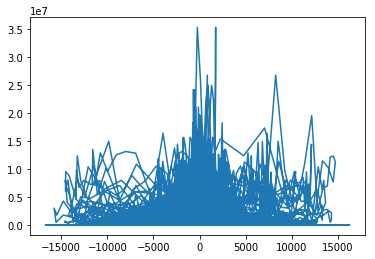

In [79]:
rate, data = wavfile.read('/Users/Downloads/trompEssen.wav')
fft_out = scipy.fft(data)
mpt.plot(data,np.abs(fft_out))
mpt.show()